# Climate Analysis

In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
from sqlalchemy.sql.expression import func

In [2]:
# Create SQLite database file
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [4]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [5]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['hawaii_measurement', 'stations']

In [6]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [7]:
# view the names of tables within the database
inspector.get_table_names()

['hawaii_measurement', 'stations']

In [8]:
# Column information for hawaii_measurement table.
inspector.get_columns("hawaii_measurement")

[{'autoincrement': 'auto',
  'default': None,
  'name': 'measurement_id',
  'nullable': False,
  'primary_key': 1,
  'type': INTEGER()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'station',
  'nullable': True,
  'primary_key': 0,
  'type': VARCHAR(length=255)},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'date',
  'nullable': True,
  'primary_key': 0,
  'type': VARCHAR(length=255)},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'prcp',
  'nullable': True,
  'primary_key': 0,
  'type': FLOAT()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'tobs',
  'nullable': True,
  'primary_key': 0,
  'type': INTEGER()}]

In [9]:
# Column information for stations table
inspector.get_columns("stations")

[{'autoincrement': 'auto',
  'default': None,
  'name': 'station',
  'nullable': False,
  'primary_key': 1,
  'type': VARCHAR(length=255)},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'name',
  'nullable': True,
  'primary_key': 0,
  'type': VARCHAR(length=255)},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'latitude',
  'nullable': True,
  'primary_key': 0,
  'type': FLOAT()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'longitude',
  'nullable': True,
  'primary_key': 0,
  'type': FLOAT()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'elevation',
  'nullable': True,
  'primary_key': 0,
  'type': FLOAT()}]

In [10]:
# Assign the classes to respective variables
Measurement = Base.classes.hawaii_measurement
Stations = Base.classes.stations

In [11]:
# Create a session
session = Session(engine)

## Precipitation Analysis

In [12]:
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

In [13]:
# query_date = today's date - 1 year
query_date = datetime.strftime((datetime.now()-relativedelta(years=1)), '%Y-%m-%d')

In [14]:
# Query to retrieve the last 12 months of precipitation data.
prcp_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > query_date).order_by(Measurement.date.desc()).all()

In [15]:
# send queried data into Pandas Data Frame
import pandas as pd
prcp_data_df = pd.DataFrame(prcp_data)
prcp_data_df

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
5,2017-08-22,0.00
6,2017-08-22,0.50
7,2017-08-21,0.00
8,2017-08-21,0.02
9,2017-08-21,0.56


In [16]:
# set 'date' as index for the data frame.
prcp_data_df = prcp_data_df.set_index('date')
prcp_data_df.head(5)

,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


In [17]:
# import dependencies to plot data
import matplotlib.pyplot as plt
import seaborn as sns

### Dataframe Plot

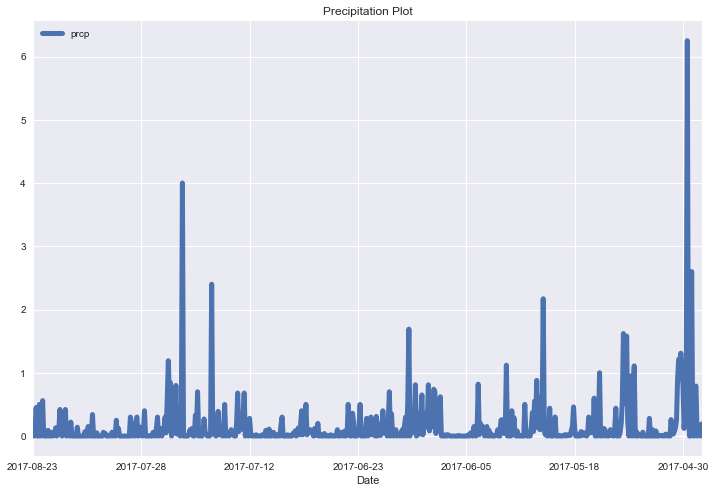

In [18]:
sns.set()
prcp_data_df.plot(use_index=True, figsize = (12,8), grid=True, title = 'Precipitation Plot', kind = 'line',linewidth = 5)
plt.xlabel('Date')
plt.show()

### Precipitation Summary Statistics

In [19]:
prcp_data_df.describe()

,prcp
count,619.000000
mean,0.151551
std,0.407958
min,0.000000
25%,0.000000
50%,0.020000
75%,0.125000
max,6.250000


## Station Analysis

In [20]:
# Query to calculate the total number of stations
stations = session.query(Measurement).group_by(Measurement.station).count()
stations

9

In [21]:
data_count = session.query(Measurement).count()
data_count

18103

In [22]:
# Query to find the most active stations
station_Obs = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

In [23]:
station_Obs

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

#### Which station has the highest number of observations? 

In [24]:
# query to get the station name of the highest number of observations.
# returns the first row of the data returned by the query.
station_Obs_1 = session.query(Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()
station_Obs_1[0]

'USC00519281'

In [25]:
# query to retrieve the last 12 months of temperature observation data (tobs)
# Filter by the station with the highest number of observations
temp_12m = session.query(Measurement.date, Measurement.tobs).filter((Measurement.date > '2017-04-15')& 
                                                                    (Measurement.station == station_Obs_1[0])).all()

In [26]:
# number of records returned 
len(temp_12m)

116

In [27]:
# Data Frame the 12 month temp data
temp_12m_df = pd.DataFrame(temp_12m)
temp_12m_df=temp_12m_df.set_index('date')
max_temp = temp_12m_df['tobs'].max()
min_temp = temp_12m_df['tobs'].min()
print(min_temp, max_temp)


60 83


In [28]:
import numpy as np

In [29]:
temp_12m_df.plot.hist(by = temp_12m_df.tobs, bins = 12, figsize = (8,8))

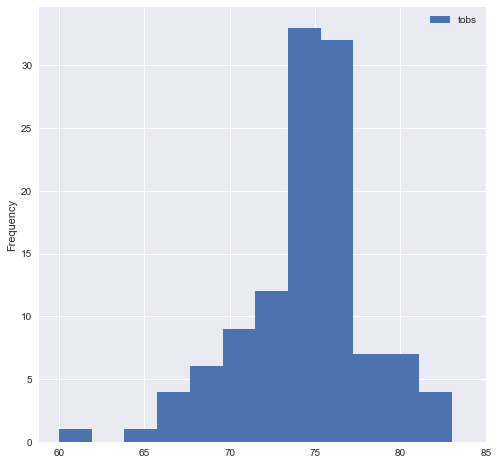

In [30]:
plt.xticks(np.arange(60,90, 5))
plt.show()

## Temperature Analysis

#### Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.

In [31]:
import numpy as np

In [32]:
# function to calculate temp stats for the trip dates in the previous year
def calc_temps(trip_st_dt, trip_end_dt):
    # reduce the year by '1' to query the previous year during the same month and year
    qry_strt_dt = datetime.strftime((datetime.strptime(trip_st_dt, '%Y-%m-%d')-relativedelta(years=1)), '%Y-%m-%d')
    qry_end_dt = datetime.strftime((datetime.strptime(trip_end_dt, '%Y-%m-%d')-relativedelta(years=1)), '%Y-%m-%d')
    
    temp_stats = session.query(func.min(Measurement.tobs),
                             func.max(Measurement.tobs), 
                             func.avg(Measurement.tobs)).filter((Measurement.date > qry_strt_dt) & 
                                                                (Measurement.date < qry_end_dt)).all()
    return temp_stats

In [33]:
start_date = input('Enter Start Date (yyyy-mm-dd) : ')
end_date = input('Enter End Date (yyyy-mm-dd) : ')
temp_stats = calc_temps(start_date, end_date)

Enter Start Date (yyyy-mm-dd) : 2018-05-01
Enter End Date (yyyy-mm-dd) : 2018-05-15


In [34]:
temp_stat = temp_stats[0]
temp_stat

(66, 80, 75.47142857142858)

In [35]:
plt.figure(figsize=(1,3))
plt.bar(1,height=temp_stat[2],yerr = (temp_stat[1]-temp_stat[0]))
plt.xticks([])
plt.ylabel('Temp (F)')
plt.title('Trip Avg Temp')

Text(0.5,1,'Trip Avg Temp')

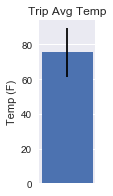

In [36]:
plt.show()

### Optional Query 1 : Calculate the rainfall per weather station using the previous year's matching dates.

In [37]:
# function to calculate rainfall per weather station using previous year's matching dates
def calc_rainfall(trip_st_dt, trip_end_dt):
    # reduce the year by '1' to query the previous year during the same month and year
    qry_strt_dt = datetime.strftime((datetime.strptime(trip_st_dt, '%Y-%m-%d')-relativedelta(years=1)), '%Y-%m-%d')
    qry_end_dt = datetime.strftime((datetime.strptime(trip_end_dt, '%Y-%m-%d')-relativedelta(years=1)), '%Y-%m-%d')
    
    rainfall_perStation = session.query(Measurement.station,func.sum(Measurement.prcp)).filter((Measurement.date > qry_strt_dt) & 
                                                                (Measurement.date < qry_end_dt)).group_by(Measurement.station).all()
    return rainfall_perStation

In [38]:
start_date = input('Enter Start Date (yyyy-mm-dd) : ')
end_date = input('Enter End Date (yyyy-mm-dd) : ')
rainfall_stats = calc_rainfall(start_date, end_date)

Enter Start Date (yyyy-mm-dd) : 2018-05-01
Enter End Date (yyyy-mm-dd) : 2018-05-15


In [39]:
rainfall_stats

[('USC00513117', 2.1399999999999997),
 ('USC00514830', 1.91),
 ('USC00516128', 3.6600000000000006),
 ('USC00519281', 2.9800000000000004),
 ('USC00519397', 0.01),
 ('USC00519523', 0.74)]

### Optional Query 2 : Calculate the daily normals. Normals are the averages for min, avg, and max temperatures.

In [40]:
#Create a function called daily_normals that will calculate the daily normals for a specific date. 
#This date string will be in the format %m-%d. Be sure to use all historic tobs that match that date string.

def daily_normals(analyse_dt):
    
    daily_norm_data = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(func.strftime("%m-%d", Measurement.date) == analyse_dt).all()
    return daily_norm_data[0]

In [41]:
#check the function daily_normals

# enter a date to find the normals
analyse_dt = input("Enter a date to analyse (%m - %d) : ")
norm_data = daily_normals(analyse_dt)

Enter a date to analyse (%m - %d) : 05-01


In [42]:
# display the daily normals
norm_data

(65, 79, 72.75925925925925)

In [43]:
#Create a list of dates for your trip in the format %m-%d

# enter the trip start and end dates
start_date = input('Enter Start Date (mm-dd) : ')
end_date = input('Enter End Date (mm-dd) : ')

# list of dates for the trip
trip_dts = []
# condition for while loop to create the trip dates list (trip_dts[])
isLess = True
# variables for while loop
end_month = datetime.strptime(end_date, '%m-%d').month
end_day = datetime.strptime(end_date, '%m-%d').day
new_date = start_date

# loop to create trip_dts list
while isLess == True :
    trip_dts.append(new_date)
    next_date = datetime.strptime(new_date, '%m-%d')+timedelta(days=1)
    new_date = datetime.strftime(next_date, '%m-%d')
    new_month = datetime.strptime(new_date, '%m-%d').month
    new_day = datetime.strptime(new_date, '%m-%d').day
    if ((new_month <= end_month) & (new_day <= end_day)):
            isLess = True 
    else :
        isLess = False


Enter Start Date (mm-dd) : 05-01
Enter End Date (mm-dd) : 05-15


In [44]:
#Use the daily_normals function to calculate the normals for each date string and append the results to a list.
norm_data = []
for date in trip_dts :
    norm_data.append(daily_normals(date))

daily_norm_dict = {}
for i in range(len(trip_dts)):
    daily_norm_dict.update({trip_dts[i] :norm_data[i]})


In [45]:
daily_norm_dict

{'05-01': (65, 79, 72.75925925925925),
 '05-02': (65, 79, 73.09433962264151),
 '05-03': (67, 84, 73.28846153846153),
 '05-04': (65, 78, 73.47169811320755),
 '05-05': (67, 79, 73.2),
 '05-06': (66, 80, 73.05454545454545),
 '05-07': (64, 79, 71.9),
 '05-08': (65, 80, 72.16326530612245),
 '05-09': (67, 79, 72.87755102040816),
 '05-10': (64, 78, 73.31481481481481),
 '05-11': (65, 79, 73.66),
 '05-12': (65, 79, 73.14),
 '05-13': (67, 79, 73.05660377358491),
 '05-14': (63, 80, 73.83333333333333),
 '05-15': (63, 79, 73.46153846153847)}

In [46]:
# convert the dictionary into Data Frame
daily_norm_df = pd.DataFrame(daily_norm_dict)

In [47]:
# transpose the data frame so the dates become rows and temp stats become columns
daily_norm_df = daily_norm_df.transpose()

In [48]:
# rename the columns 
daily_norm_df.columns = ['tmin', 'tmax', 'tavg']
# name the index column to date
daily_norm_df.index.name = 'date'

In [49]:
daily_norm_df

,tmin,tmax,tavg
date,,,
05-01,65.0,79.0,72.759259
05-02,65.0,79.0,73.094340
05-03,67.0,84.0,73.288462
05-04,65.0,78.0,73.471698
05-05,67.0,79.0,73.200000
05-06,66.0,80.0,73.054545
05-07,64.0,79.0,71.900000
05-08,65.0,80.0,72.163265
05-09,67.0,79.0,72.877551


#### Use Pandas to plot an area plot (stacked=False) for the daily normals.

In [50]:
sns.set_palette("pastel")
colors = ['lightblue', 'lightcoral', 'lightbrown']
daily_norm_df.plot(kind = 'area',stacked=False, figsize = (8,5), rot = '45', alpha = 0.2, linewidth = 4)

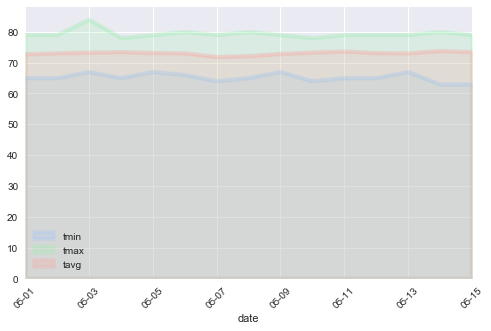

In [51]:
plt.show()